In [1]:
import pycaret
import numpy as np
import pandas as pd

## Read the data

In [2]:
data=pd.read_csv('boston.csv')

In [3]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 15)

In [5]:
data.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [6]:
from pycaret.regression import *
reg_experiment = setup(data, 
                       target = 'medv', 
                       session_id=123, 
                       log_experiment=True, 
                       experiment_name='ca_housing')

,Description,Value
0,session_id,123
1,Target,medv
2,Original Data,"(506, 15)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


## Compare Baseline Model

In [7]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0322,9.2082,2.8932,0.8912,0.1291,0.1001,0.2100
gbr,Gradient Boosting Regressor,2.1344,9.2745,2.9774,0.8833,0.1441,0.1107,0.0790
rf,Random Forest Regressor,2.2293,10.5967,3.1446,0.8677,0.1447,0.1131,0.2960
lightgbm,Light Gradient Boosting Machine,2.3108,11.4267,3.2673,0.8592,0.1481,0.1155,0.0570
ada,AdaBoost Regressor,2.8158,15.7247,3.8118,0.8093,0.1795,0.1493,0.0890
ridge,Ridge Regression,3.2905,22.7118,4.6482,0.7290,0.2421,0.1663,0.0600
br,Bayesian Ridge,3.2838,22.8926,4.6529,0.7288,0.2397,0.1654,0.0210
lr,Linear Regression,3.3139,22.6937,4.6540,0.7272,0.2462,0.1668,0.8730
dt,Decision Tree Regressor,2.9604,20.7307,4.3029,0.7209,0.1969,0.1497,0.0220
lasso,Lasso Regression,3.6476,27.5274,5.0826,0.6755,0.2576,0.1747,0.0520


In [8]:
Extra_tree_regressor = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6402,12.4201,3.5242,0.8610,0.1325,0.1018
1,1.5590,4.1921,2.0475,0.9095,0.0974,0.0824
2,1.7909,5.1015,2.2586,0.9491,0.1318,0.1066
3,2.4982,15.7893,3.9736,0.8443,0.1665,0.1305
4,2.1115,6.2586,2.5017,0.9469,0.1124,0.1027
5,1.9529,7.7492,2.7837,0.8558,0.1435,0.1052
6,1.5671,3.9040,1.9758,0.9421,0.0868,0.0740
7,2.7300,24.3667,4.9363,0.7764,0.1796,0.1210
8,1.6645,4.8283,2.1973,0.9136,0.1240,0.0976
9,1.8079,7.4721,2.7335,0.9135,0.1166,0.0790


In [9]:
tuned_extra_tree_regressor = tune_model(Extra_tree_regressor, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6063,13.2498,3.6400,0.8518,0.1458,0.0978
1,1.6026,5.0716,2.2520,0.8905,0.1039,0.0848
2,2.2198,6.9458,2.6355,0.9307,0.1604,0.1399
3,2.8496,22.6728,4.7616,0.7764,0.1913,0.1466
4,2.3075,7.7437,2.7827,0.9343,0.1243,0.1110
5,1.9620,7.6706,2.7696,0.8573,0.1447,0.1081
6,1.4651,3.4531,1.8582,0.9488,0.0770,0.0659
7,3.0140,34.0659,5.8366,0.6874,0.2101,0.1295
8,1.8493,5.8096,2.4103,0.8961,0.1484,0.1163
9,1.8467,8.9394,2.9899,0.8966,0.1338,0.0805


## Visualizing the Model’s Performance

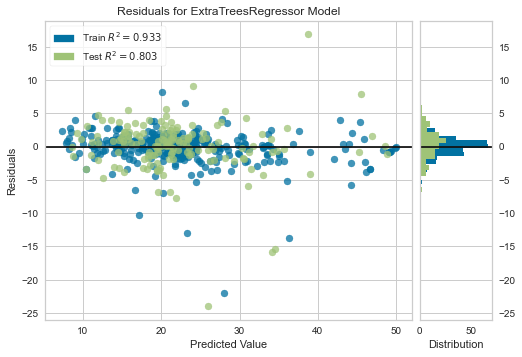

In [10]:
plot_model(tuned_extra_tree_regressor)

## Prediction Error

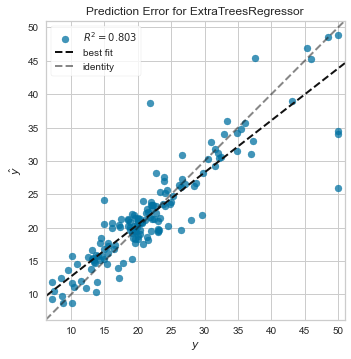

In [11]:
plot_model(tuned_extra_tree_regressor, plot = 'error')

## Feature Importance

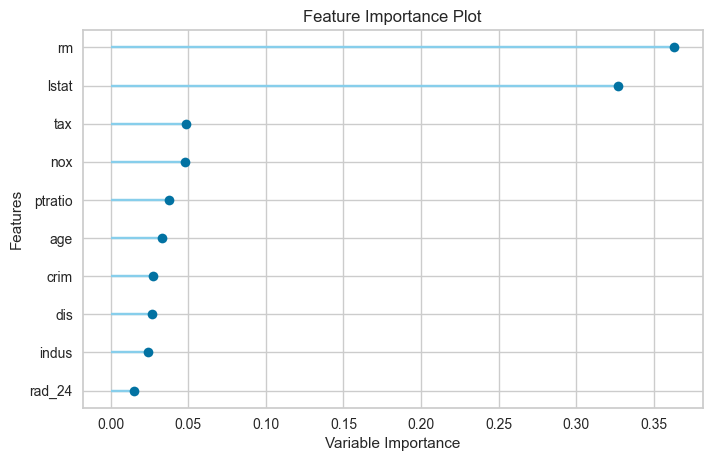

In [12]:
plot_model(tuned_extra_tree_regressor, plot = 'feature')

## Evaluating the Model Using All Plots

In [13]:
evaluate_model(tuned_extra_tree_regressor)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Interpreting the Model

In [16]:
!pip install shap

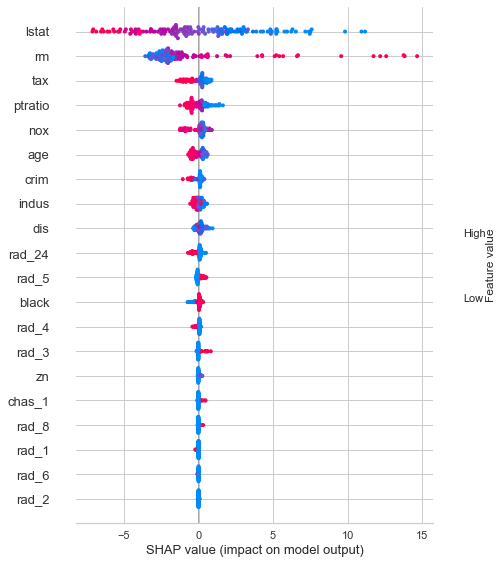

In [17]:
interpret_model(tuned_extra_tree_regressor)

## AutoML(To automate the ML Algorithm)

In [18]:
automl_model = automl(optimize = 'MAE')

In [19]:
print(automl_model)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


## Generating Predictions

In [20]:
predictions = predict_model(automl_model)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2.1430,11.5027,3.3916,0.8577,0.1459,0.1133


,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,...,rad_2,rad_24,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,medv,Label
0,51.135799,0.0,18.10,0.5970,5.757,100.000000,1.4130,666.0,20.200001,2.600000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,34.613000
1,0.057350,0.0,4.49,0.4490,6.630,56.099998,4.4377,247.0,18.500000,392.299988,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26.600000,28.052000
2,0.035780,20.0,3.33,0.4429,7.820,64.500000,4.6947,216.0,14.900000,387.309998,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,45.400002,47.489000
3,12.048200,0.0,18.10,0.6140,5.648,87.599998,1.9512,666.0,20.200001,291.549988,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20.799999,18.629000
4,0.031500,95.0,1.47,0.4030,6.975,15.300000,7.6534,402.0,17.000000,396.899994,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.900002,32.670001


In [22]:
new_data = data.copy()
new_data.drop(['medv'], axis=1, inplace=True)
predictions = predict_model(automl_model, data=new_data)
predictions.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Label
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,27.755000
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.600000
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.700001
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.400002
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.200001
